# Primeiro Experimento

## Primeiro subexperimento R_KM = 150 km

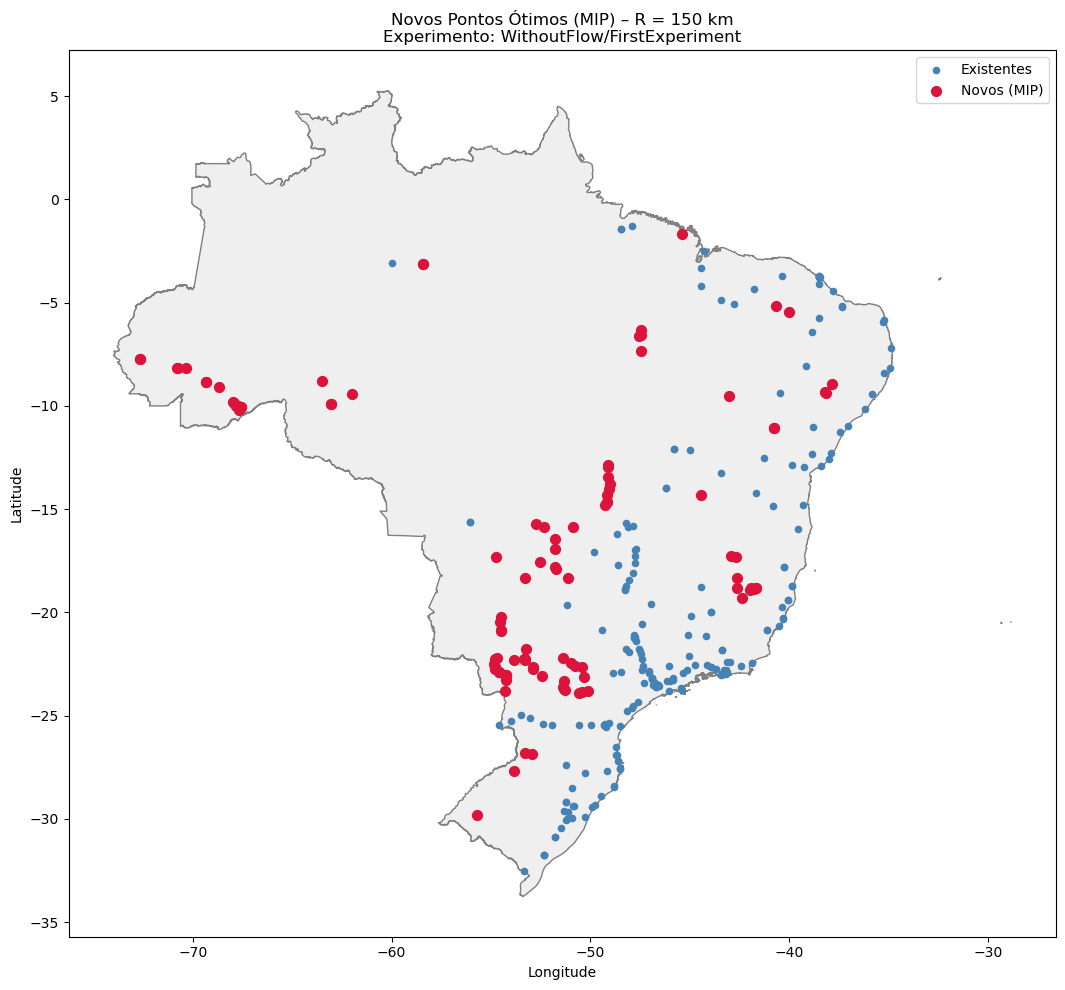

In [14]:
# %% [markdown]
# ## Visualização dos pontos existentes e dos novos (MIP)

# %%
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from pathlib import Path

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()  # ou Path(__file__).parent se estiver dentro de um .py
CUR = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Escolha aqui qual experimento você quer visualizar:
EXPERIMENTO = "WithoutFlow/FirstExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
sup = pd.read_parquet( PARQUET_DIR /     "supply_existing.parquet" )
new = pd.read_parquet( OUTPUT_DIR   / "sites_new_mip_experiment1.parquet" )

# ─────────── MAPEAR LON/LAT VIA GRAFO ───────────
lon_map = {n: d["x"] for n, d in G.nodes(data=True)}
lat_map = {n: d["y"] for n, d in G.nodes(data=True)}
sup["lon"] = sup["node"].map(lon_map)
sup["lat"] = sup["node"].map(lat_map)
if "lon" not in new or "lat" not in new:
    new["lon"] = new["node"].map(lon_map)
    new["lat"] = new["node"].map(lat_map)

# ─────────── GEO DATAFRAMES ───────────
g_exist = gpd.GeoDataFrame(sup, geometry=gpd.points_from_xy(sup.lon, sup.lat), crs="EPSG:4326")
g_new   = gpd.GeoDataFrame(new, geometry=gpd.points_from_xy(new.lon, new.lat), crs="EPSG:4326")

# ─────────── CARREGA STAND-ALONE SHAPEFILE (opcional) ───────────
br_shp = CUR / "dados" / "BR_Pais_2023" / "BR_Pais_2023.shp"
if br_shp.exists():
    brasil = gpd.read_file(br_shp)
else:
    brasil = None

# ─────────── PLOT ───────────
fig, ax = plt.subplots(figsize=(12, 10))
if brasil is not None:
    brasil.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_exist.plot(ax=ax, marker="o", color="steelblue", markersize=20, label="Existentes", zorder=2)
g_new.plot( ax=ax, marker="o", color="crimson", markersize=50, label="Novos (MIP)", zorder=3)

ax.set_title(f"Novos Pontos Ótimos (MIP) – R = 150 km\nExperimento: {EXPERIMENTO}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

## Segundo subexperimento R_KM = 50 km

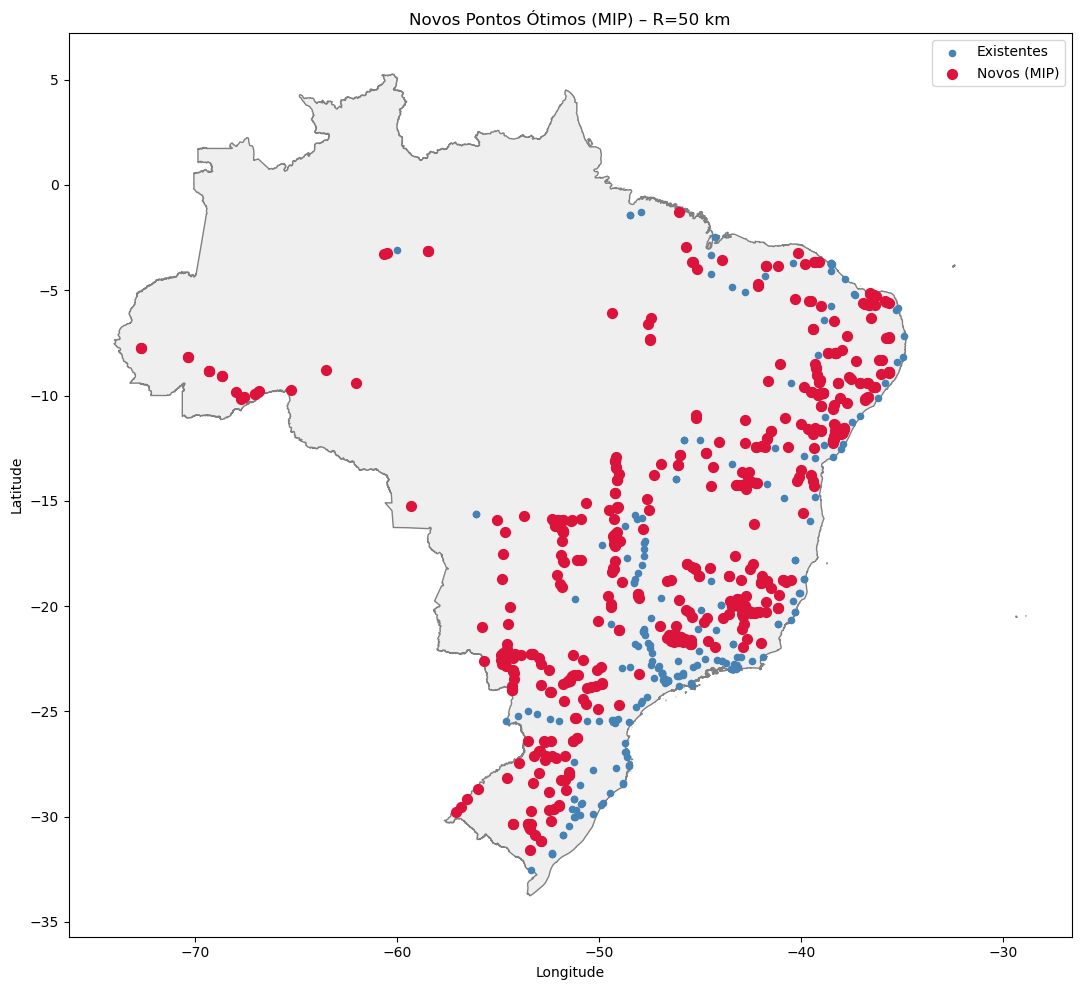

In [15]:
# %% [markdown]
# ## Visualização dos pontos existentes e dos novos (MIP)

# %%
import pandas as pd
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pathlib import Path

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()  # ou Path(__file__).parent se estiver dentro de um .py
CUR = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Escolha aqui qual experimento você quer visualizar:
EXPERIMENTO = "WithoutFlow/FirstExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
sup = pd.read_parquet( PARQUET_DIR /     "supply_existing.parquet" )
new = pd.read_parquet( OUTPUT_DIR   / "sites_new_mip_experiment2.parquet" )

# ───────── mapear lon/lat via grafo ─────────
# cria dois dicts de lookup {node: x} e {node: y}
lon_map = {n: data["x"] for n, data in G.nodes(data=True)}
lat_map = {n: data["y"] for n, data in G.nodes(data=True)}

# se ainda não existirem, atribui
sup["lon"] = sup["node"].map(lon_map)
sup["lat"] = sup["node"].map(lat_map)
# no seu case o `new` já pode ter lat/lon,
# mas só por segurança:
if "lon" not in new or "lat" not in new:
    new["lon"] = new["node"].map(lon_map)
    new["lat"] = new["node"].map(lat_map)

# ───────── montar GeoDataFrames ──────────────
g_exist = gpd.GeoDataFrame(
    sup,
    geometry=gpd.points_from_xy(sup["lon"], sup["lat"]),
    crs="EPSG:4326"
)
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new["lon"], new["lat"]),
    crs="EPSG:4326"
)

# ───────── carregar shapefile do Brasil ──────────────
br_shp = Path("../dados/BR_Pais_2023/BR_Pais_2023.shp")
if br_shp.exists():
    brasil = gpd.read_file(br_shp)
else:
    brasil = None

# ───────── plot ──────────────
fig, ax = plt.subplots(figsize=(12, 10))
if brasil is not None:
    brasil.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_exist.plot(
    ax=ax,
    marker="o",
    color="steelblue",
    markersize=20,
    label="Existentes",
    zorder=2
)
g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=50,
    label="Novos (MIP)",
    zorder=3
)

ax.set_title(f"Novos Pontos Ótimos (MIP) – R={50} km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

## Terceiro subexperimento R_KM = 300 km

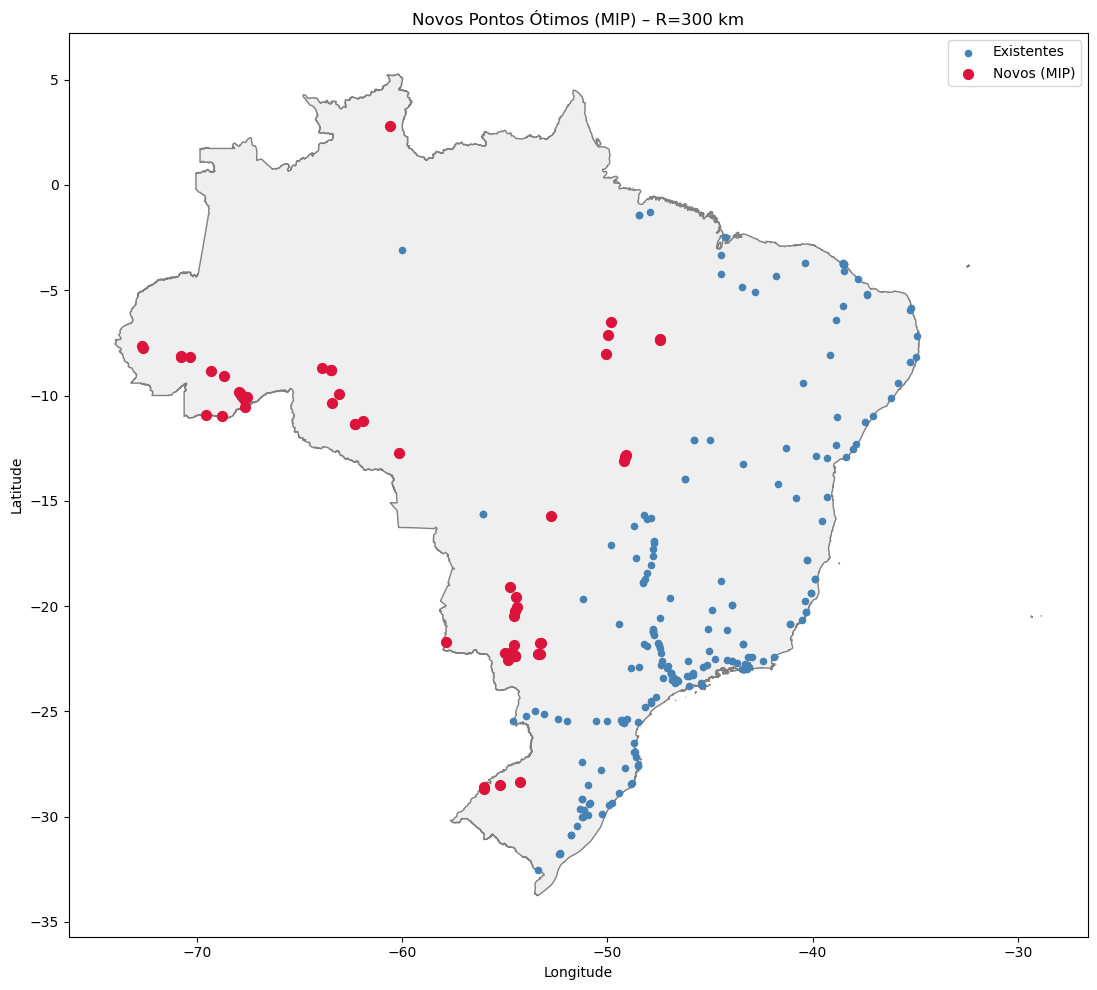

In [16]:
# %% [markdown]
# ## Visualização dos pontos existentes e dos novos (MIP)

# %%
import pandas as pd
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pathlib import Path

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()  # ou Path(__file__).parent se estiver dentro de um .py
CUR = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Escolha aqui qual experimento você quer visualizar:
EXPERIMENTO = "WithoutFlow/FirstExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
sup = pd.read_parquet( PARQUET_DIR /     "supply_existing.parquet" )
new = pd.read_parquet( OUTPUT_DIR   / "sites_new_mip_experiment3.parquet" )

# ───────── mapear lon/lat via grafo ─────────
# cria dois dicts de lookup {node: x} e {node: y}
lon_map = {n: data["x"] for n, data in G.nodes(data=True)}
lat_map = {n: data["y"] for n, data in G.nodes(data=True)}

# se ainda não existirem, atribui
sup["lon"] = sup["node"].map(lon_map)
sup["lat"] = sup["node"].map(lat_map)
# no seu case o `new` já pode ter lat/lon,
# mas só por segurança:
if "lon" not in new or "lat" not in new:
    new["lon"] = new["node"].map(lon_map)
    new["lat"] = new["node"].map(lat_map)

# ───────── montar GeoDataFrames ──────────────
g_exist = gpd.GeoDataFrame(
    sup,
    geometry=gpd.points_from_xy(sup["lon"], sup["lat"]),
    crs="EPSG:4326"
)
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new["lon"], new["lat"]),
    crs="EPSG:4326"
)

# ───────── carregar shapefile do Brasil ──────────────
br_shp = Path("../dados/BR_Pais_2023/BR_Pais_2023.shp")
if br_shp.exists():
    brasil = gpd.read_file(br_shp)
else:
    brasil = None

# ───────── plot ──────────────
fig, ax = plt.subplots(figsize=(12, 10))
if brasil is not None:
    brasil.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_exist.plot(
    ax=ax,
    marker="o",
    color="steelblue",
    markersize=20,
    label="Existentes",
    zorder=2
)
g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=50,
    label="Novos (MIP)",
    zorder=3
)

ax.set_title(f"Novos Pontos Ótimos (MIP) – R={300} km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

# Segundo Experimento

## Primeiro subexperimento R_KM = 150 km

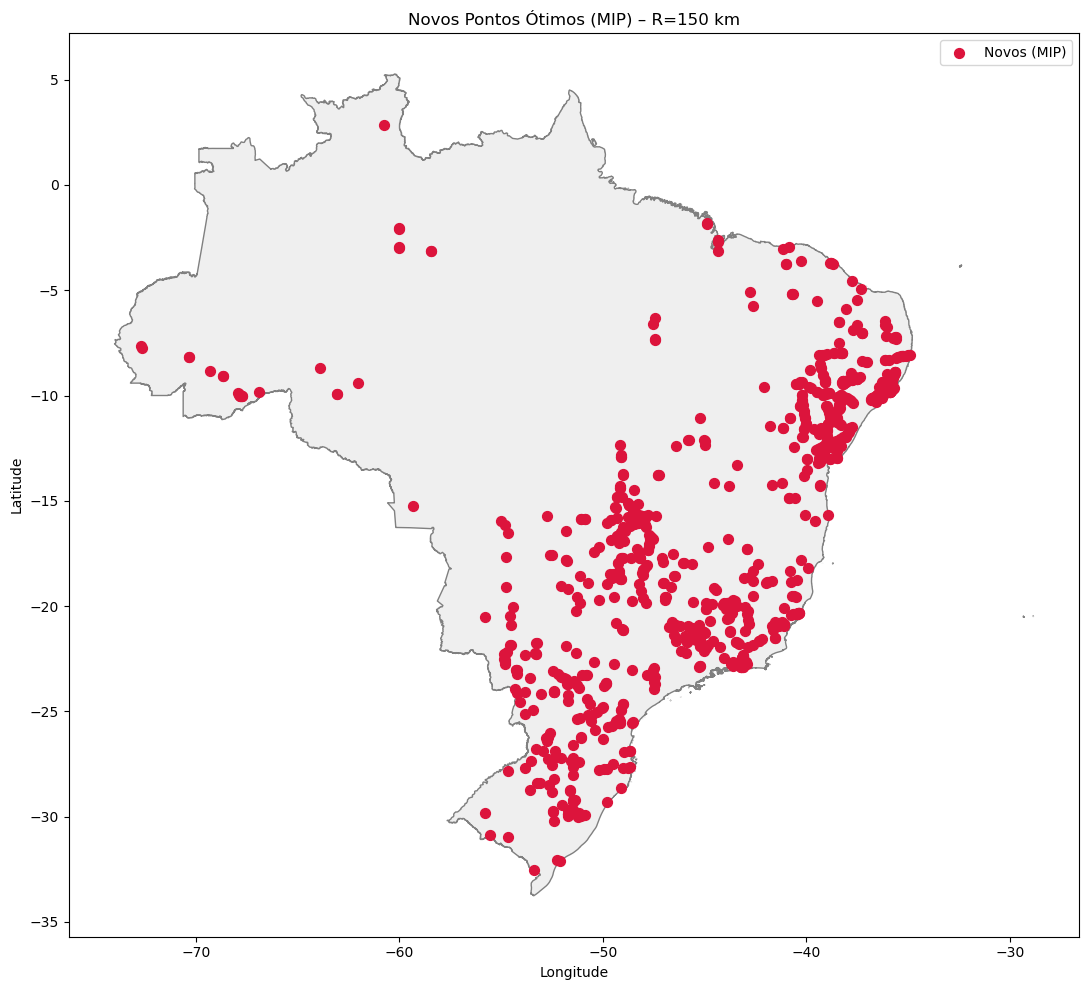

In [17]:
# %% [markdown]
# ## Visualização apenas dos novos pontos (MIP), sem mostrar os existentes

# %%
import pandas as pd
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pathlib import Path

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()  # ou Path(__file__).parent se estiver dentro de um .py
CUR = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Escolha aqui qual experimento você quer visualizar:
EXPERIMENTO = "WithoutFlow/SecondExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
sup = pd.read_parquet( PARQUET_DIR /     "supply_existing.parquet" )
new = pd.read_parquet( OUTPUT_DIR   / "sites_new_mip_experiment4.parquet" )

# ───────── mapear lon/lat via grafo (caso não venha no parquet) ─────────
lon_map = {n: data["x"] for n, data in G.nodes(data=True)}
lat_map = {n: data["y"] for n, data in G.nodes(data=True)}

if "lon" not in new or "lat" not in new:
    new["lon"] = new["node"].map(lon_map)
    new["lat"] = new["node"].map(lat_map)

# ───────── montar GeoDataFrame apenas de novos pontos ──────────────
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new["lon"], new["lat"]),
    crs="EPSG:4326"
)

# ───────── carregar shapefile do Brasil ──────────────
br_shp = Path("../dados/BR_Pais_2023/BR_Pais_2023.shp")
brasil = gpd.read_file(br_shp) if br_shp.exists() else None

# ───────── plot ──────────────
fig, ax = plt.subplots(figsize=(12, 10))
if brasil is not None:
    brasil.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=50,
    label="Novos (MIP)",
    zorder=3
)

ax.set_title(f"Novos Pontos Ótimos (MIP) – R={150} km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

## Segundo subexperimento R_KM = 50 km

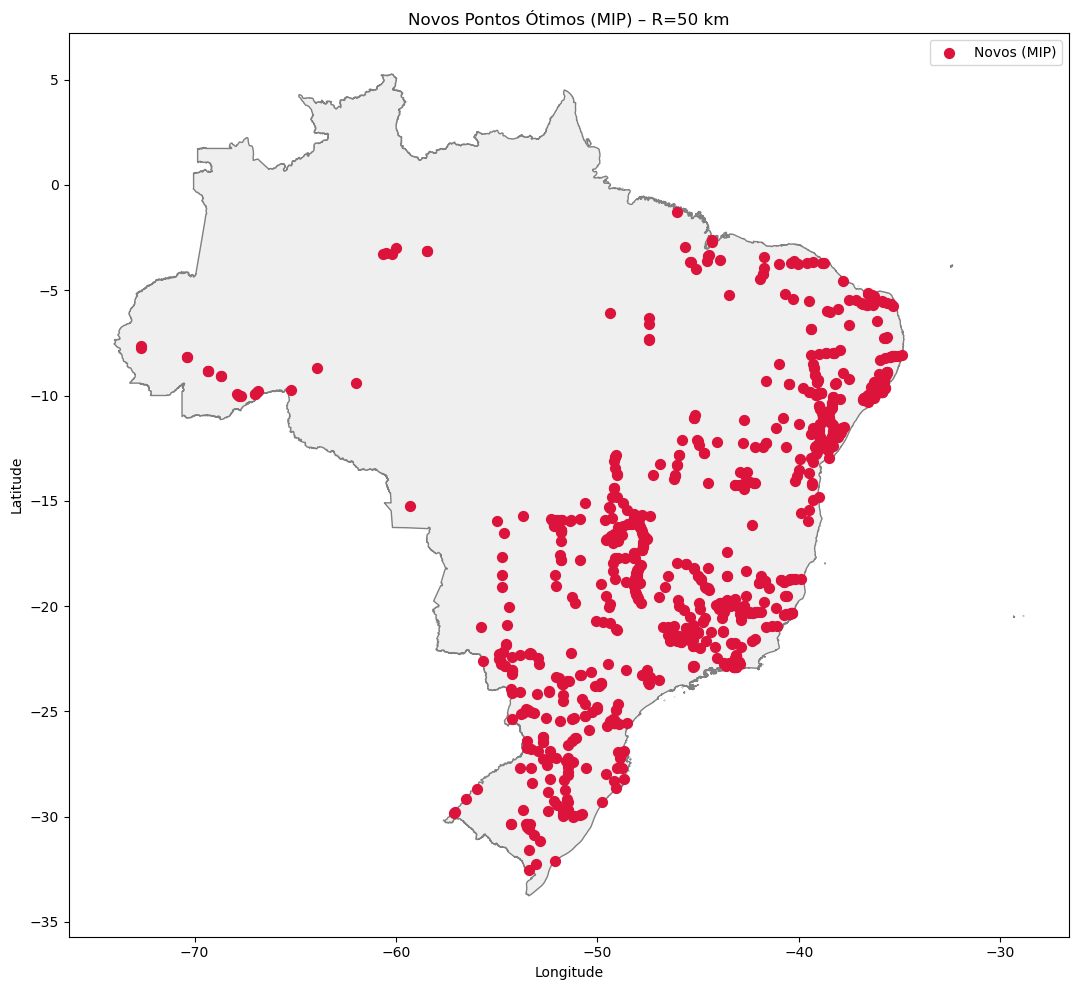

In [18]:
# %% [markdown]
# ## Visualização apenas dos novos pontos (MIP), sem mostrar os existentes

# %%
import pandas as pd
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pathlib import Path

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()  # ou Path(__file__).parent se estiver dentro de um .py
CUR = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Escolha aqui qual experimento você quer visualizar:
EXPERIMENTO = "WithoutFlow/SecondExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
sup = pd.read_parquet( PARQUET_DIR /     "supply_existing.parquet" )
new = pd.read_parquet( OUTPUT_DIR   / "sites_new_mip_experiment5.parquet" )

# ───────── mapear lon/lat via grafo (caso não venha no parquet) ─────────
lon_map = {n: data["x"] for n, data in G.nodes(data=True)}
lat_map = {n: data["y"] for n, data in G.nodes(data=True)}

if "lon" not in new or "lat" not in new:
    new["lon"] = new["node"].map(lon_map)
    new["lat"] = new["node"].map(lat_map)

# ───────── montar GeoDataFrame apenas de novos pontos ──────────────
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new["lon"], new["lat"]),
    crs="EPSG:4326"
)

# ───────── carregar shapefile do Brasil ──────────────
br_shp = Path("../dados/BR_Pais_2023/BR_Pais_2023.shp")
brasil = gpd.read_file(br_shp) if br_shp.exists() else None

# ───────── plot ──────────────
fig, ax = plt.subplots(figsize=(12, 10))
if brasil is not None:
    brasil.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=50,
    label="Novos (MIP)",
    zorder=3
)

ax.set_title(f"Novos Pontos Ótimos (MIP) – R={50} km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

## Terceiro subexperimento R_KM = 300 km

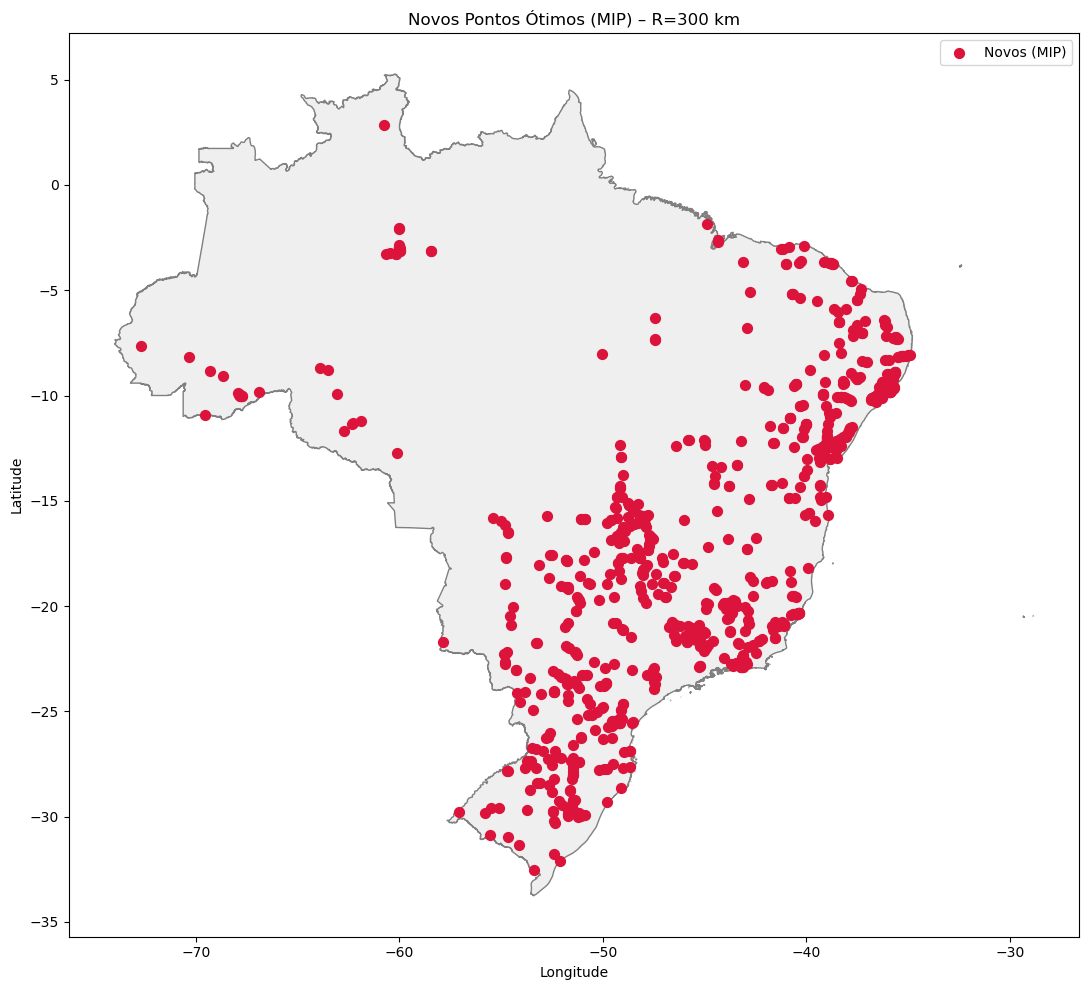

In [19]:
# %% [markdown]
# ## Visualização apenas dos novos pontos (MIP), sem mostrar os existentes

# %%
import pandas as pd
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pathlib import Path

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()  # ou Path(__file__).parent se estiver dentro de um .py
CUR = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Escolha aqui qual experimento você quer visualizar:
EXPERIMENTO = "WithoutFlow/SecondExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
sup = pd.read_parquet( PARQUET_DIR /     "supply_existing.parquet" )
new = pd.read_parquet( OUTPUT_DIR   / "sites_new_mip_experiment6.parquet" )

# ───────── mapear lon/lat via grafo (caso não venha no parquet) ─────────
lon_map = {n: data["x"] for n, data in G.nodes(data=True)}
lat_map = {n: data["y"] for n, data in G.nodes(data=True)}

if "lon" not in new or "lat" not in new:
    new["lon"] = new["node"].map(lon_map)
    new["lat"] = new["node"].map(lat_map)

# ───────── montar GeoDataFrame apenas de novos pontos ──────────────
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new["lon"], new["lat"]),
    crs="EPSG:4326"
)

# ───────── carregar shapefile do Brasil ──────────────
br_shp = Path("../dados/BR_Pais_2023/BR_Pais_2023.shp")
brasil = gpd.read_file(br_shp) if br_shp.exists() else None

# ───────── plot ──────────────
fig, ax = plt.subplots(figsize=(12, 10))
if brasil is not None:
    brasil.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=50,
    label="Novos (MIP)",
    zorder=3
)

ax.set_title(f"Novos Pontos Ótimos (MIP) – R={300} km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

# Terceiro Experimento

## Primeiro subexperimento R_KM = 150 km

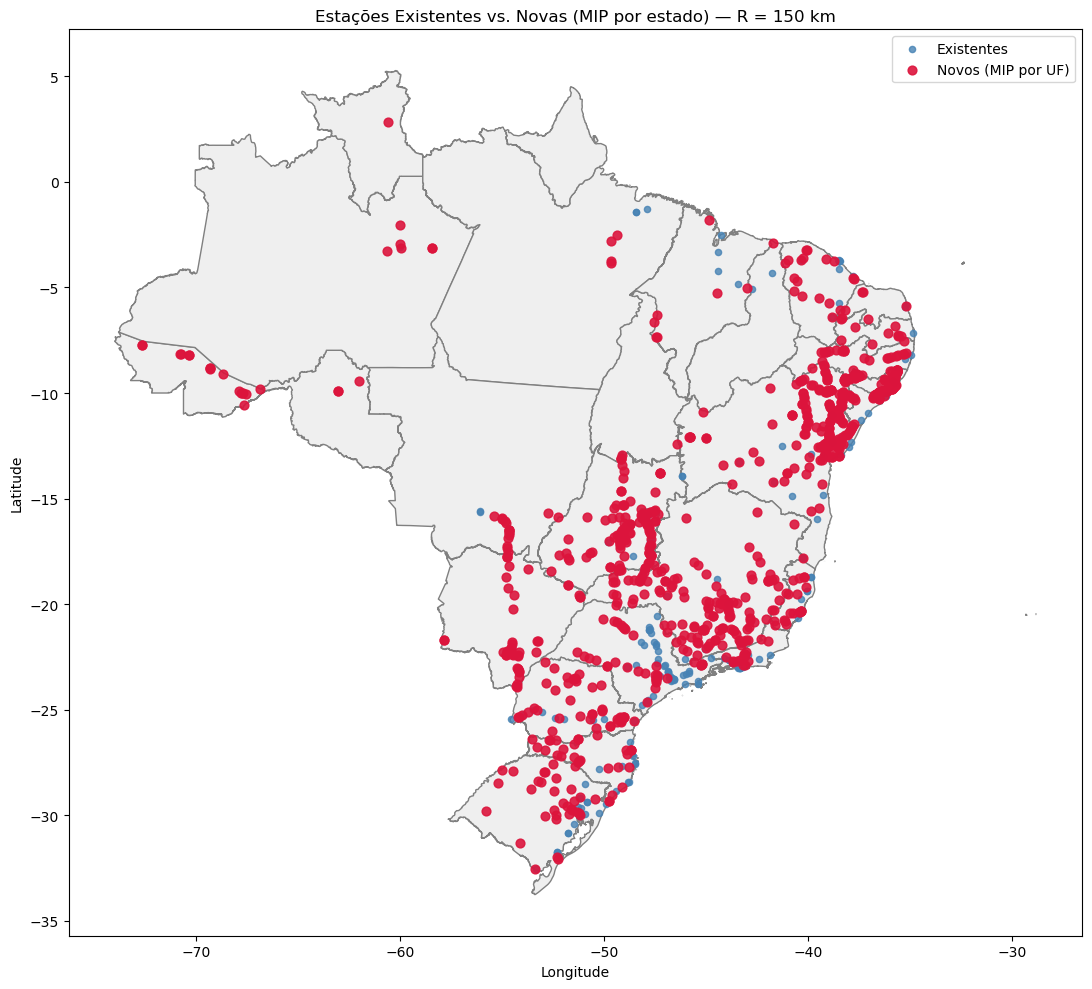

In [20]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from pathlib import Path
from shapely.geometry import Point
import geobr  # pip install geobr

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()  # ou Path(__file__).parent se estiver dentro de um .py
CUR = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Escolha aqui qual experimento você quer visualizar:
EXPERIMENTO = "WithoutFlow/ThirdExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
sup = pd.read_parquet( PARQUET_DIR /     "supply_existing.parquet" )
new = pd.read_parquet( OUTPUT_DIR   / "sites_new_mip_experiment7.parquet" )

# ── mapear lon/lat via grafo ─────────────────────
lon = {n: d["x"] for n,d in G.nodes(data=True)}
lat = {n: d["y"] for n,d in G.nodes(data=True)}
sup["lon"] = sup["node"].map(lon)
sup["lat"] = sup["node"].map(lat)
# new já deve ter lat/lon mas:
if "lon" not in new or "lat" not in new:
    new["lon"] = new["node"].map(lon)
    new["lat"] = new["node"].map(lat)

# ── monta GeoDataFrames ─────────────────────────
g_exist = gpd.GeoDataFrame(
    sup,
    geometry=gpd.points_from_xy(sup.lon, sup.lat),
    crs="EPSG:4326"
)
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new.lon, new.lat),
    crs="EPSG:4326"
)

# ── carrega malha de estados via geobr ───────────
ufs = geobr.read_state(year=2020)[["abbrev_state","geometry"]]
ufs = ufs.rename(columns={"abbrev_state":"UF"})

# ── plot ────────────────────────────────────────
fig, ax = plt.subplots(1,1, figsize=(12,10))
ufs.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_exist.plot(
    ax=ax,
    marker="o",
    color="steelblue",
    markersize=20,
    label="Existentes",
    alpha=0.8,
    zorder=2
)
g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=40,
    label="Novos (MIP por UF)",
    alpha=0.9,
    zorder=3
)

ax.set_title("Estações Existentes vs. Novas (MIP por estado) — R = 150 km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Segundo subexperimento R_KM = 50 km

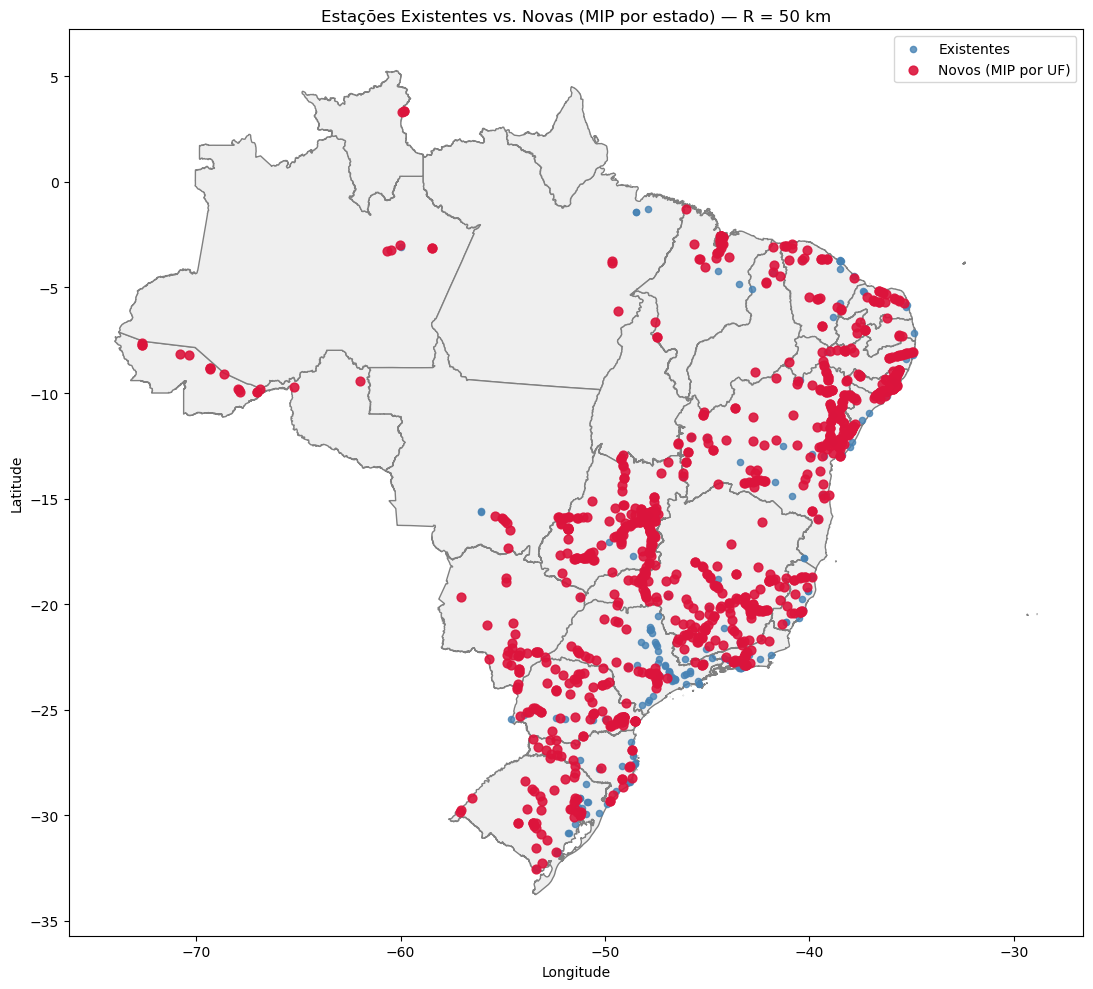

In [26]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from pathlib import Path
from shapely.geometry import Point
import geobr  # pip install geobr

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()  # ou Path(__file__).parent se estiver dentro de um .py
CUR = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Escolha aqui qual experimento você quer visualizar:
EXPERIMENTO = "WithoutFlow/ThirdExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
sup = pd.read_parquet( PARQUET_DIR /     "supply_existing.parquet" )
new = pd.read_parquet( OUTPUT_DIR   / "sites_new_mip_experiment8.parquet" )

# ── mapear lon/lat via grafo ─────────────────────
lon = {n: d["x"] for n,d in G.nodes(data=True)}
lat = {n: d["y"] for n,d in G.nodes(data=True)}
sup["lon"] = sup["node"].map(lon)
sup["lat"] = sup["node"].map(lat)
# new já deve ter lat/lon mas:
if "lon" not in new or "lat" not in new:
    new["lon"] = new["node"].map(lon)
    new["lat"] = new["node"].map(lat)

# ── monta GeoDataFrames ─────────────────────────
g_exist = gpd.GeoDataFrame(
    sup,
    geometry=gpd.points_from_xy(sup.lon, sup.lat),
    crs="EPSG:4326"
)
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new.lon, new.lat),
    crs="EPSG:4326"
)

# ── carrega malha de estados via geobr ───────────
ufs = geobr.read_state(year=2020)[["abbrev_state","geometry"]]
ufs = ufs.rename(columns={"abbrev_state":"UF"})

# ── plot ────────────────────────────────────────
fig, ax = plt.subplots(1,1, figsize=(12,10))
ufs.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_exist.plot(
    ax=ax,
    marker="o",
    color="steelblue",
    markersize=20,
    label="Existentes",
    alpha=0.8,
    zorder=2
)
g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=40,
    label="Novos (MIP por UF)",
    alpha=0.9,
    zorder=3
)

ax.set_title("Estações Existentes vs. Novas (MIP por estado) — R = 50 km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Terceiro subexperimento R_KM = 300 km

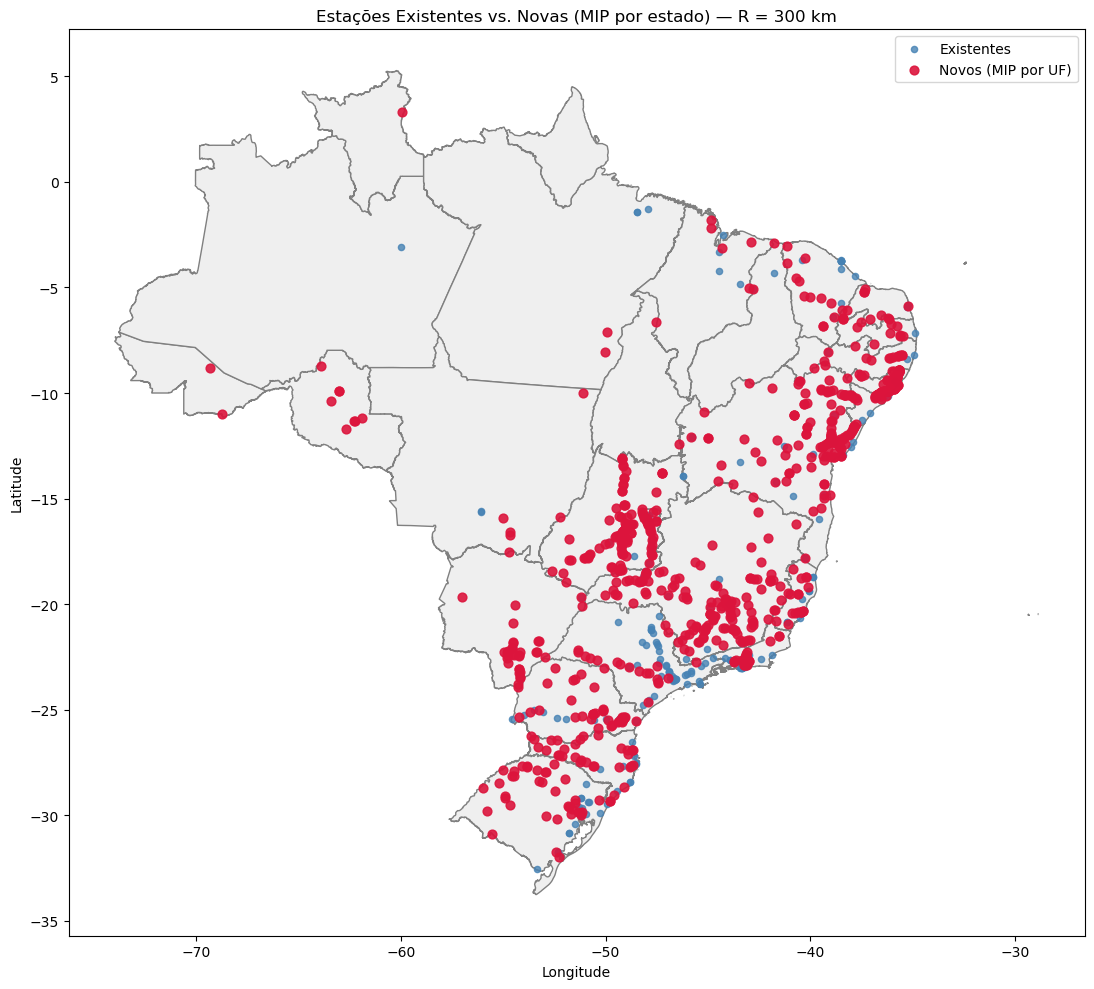

In [27]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from pathlib import Path
from shapely.geometry import Point
import geobr  # pip install geobr

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()  # ou Path(__file__).parent se estiver dentro de um .py
CUR = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Escolha aqui qual experimento você quer visualizar:
EXPERIMENTO = "WithoutFlow/ThirdExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
sup = pd.read_parquet( PARQUET_DIR /     "supply_existing.parquet" )
new = pd.read_parquet( OUTPUT_DIR   / "sites_new_mip_experiment9.parquet" )

# ── mapear lon/lat via grafo ─────────────────────
lon = {n: d["x"] for n,d in G.nodes(data=True)}
lat = {n: d["y"] for n,d in G.nodes(data=True)}
sup["lon"] = sup["node"].map(lon)
sup["lat"] = sup["node"].map(lat)
# new já deve ter lat/lon mas:
if "lon" not in new or "lat" not in new:
    new["lon"] = new["node"].map(lon)
    new["lat"] = new["node"].map(lat)

# ── monta GeoDataFrames ─────────────────────────
g_exist = gpd.GeoDataFrame(
    sup,
    geometry=gpd.points_from_xy(sup.lon, sup.lat),
    crs="EPSG:4326"
)
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new.lon, new.lat),
    crs="EPSG:4326"
)

# ── carrega malha de estados via geobr ───────────
ufs = geobr.read_state(year=2020)[["abbrev_state","geometry"]]
ufs = ufs.rename(columns={"abbrev_state":"UF"})

# ── plot ────────────────────────────────────────
fig, ax = plt.subplots(1,1, figsize=(12,10))
ufs.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_exist.plot(
    ax=ax,
    marker="o",
    color="steelblue",
    markersize=20,
    label="Existentes",
    alpha=0.8,
    zorder=2
)
g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=40,
    label="Novos (MIP por UF)",
    alpha=0.9,
    zorder=3
)

ax.set_title("Estações Existentes vs. Novas (MIP por estado) — R = 300 km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Quarto subexperiente

## Primeiro subexperimento R_KM = 150 km

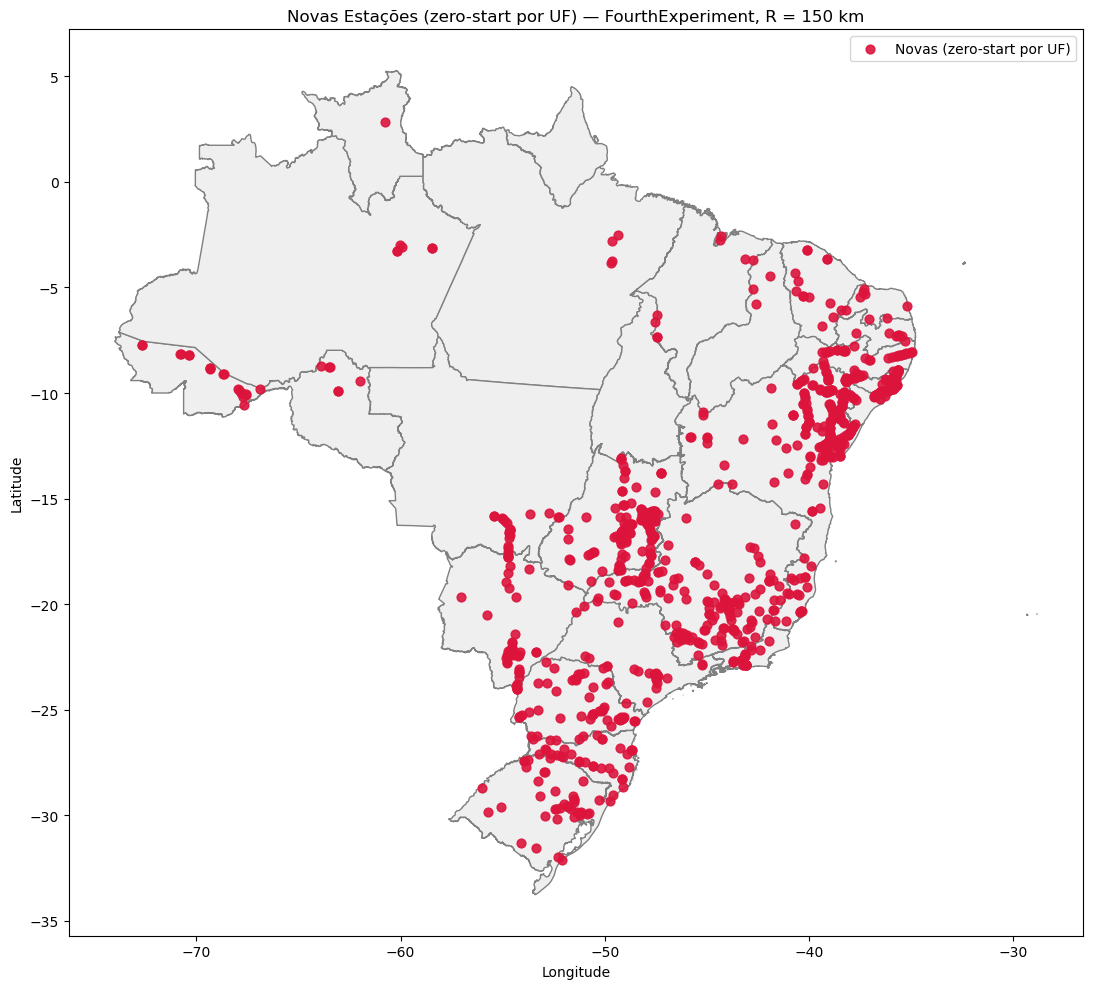

In [24]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from pathlib import Path
import geobr  # pip install geobr

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()
CUR  = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Experimento que queremos visualizar
EXPERIMENTO = "WithoutFlow/FourthExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
# 'supply_existing' não é usado aqui, pois estamos plotando só as novas
new = pd.read_parquet(OUTPUT_DIR / "sites_new_mip_experiment10.parquet")

# ─────────── MAPEAR LON/LAT VIA GRAFO ───
lon = {n: d["x"] for n, d in G.nodes(data=True)}
lat = {n: d["y"] for n, d in G.nodes(data=True)}
new["lon"] = new["node"].map(lon)
new["lat"] = new["node"].map(lat)

# ─────────── GEO DATAFRAME ───────────
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new.lon, new.lat),
    crs="EPSG:4326"
)

# ─────────── CARREGA MALHA DE ESTADOS ───
ufs = geobr.read_state(year=2020)[["abbrev_state", "geometry"]]
ufs = ufs.rename(columns={"abbrev_state": "UF"})

# ─────────── PLOT ─────────────────────
fig, ax = plt.subplots(figsize=(12, 10))
ufs.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=40,
    label="Novas (zero-start por UF)",
    alpha=0.9,
    zorder=3
)

ax.set_title("Novas Estações (zero-start por UF) — FourthExperiment, R = 150 km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Segundo subexperimento R_KM = 50 km

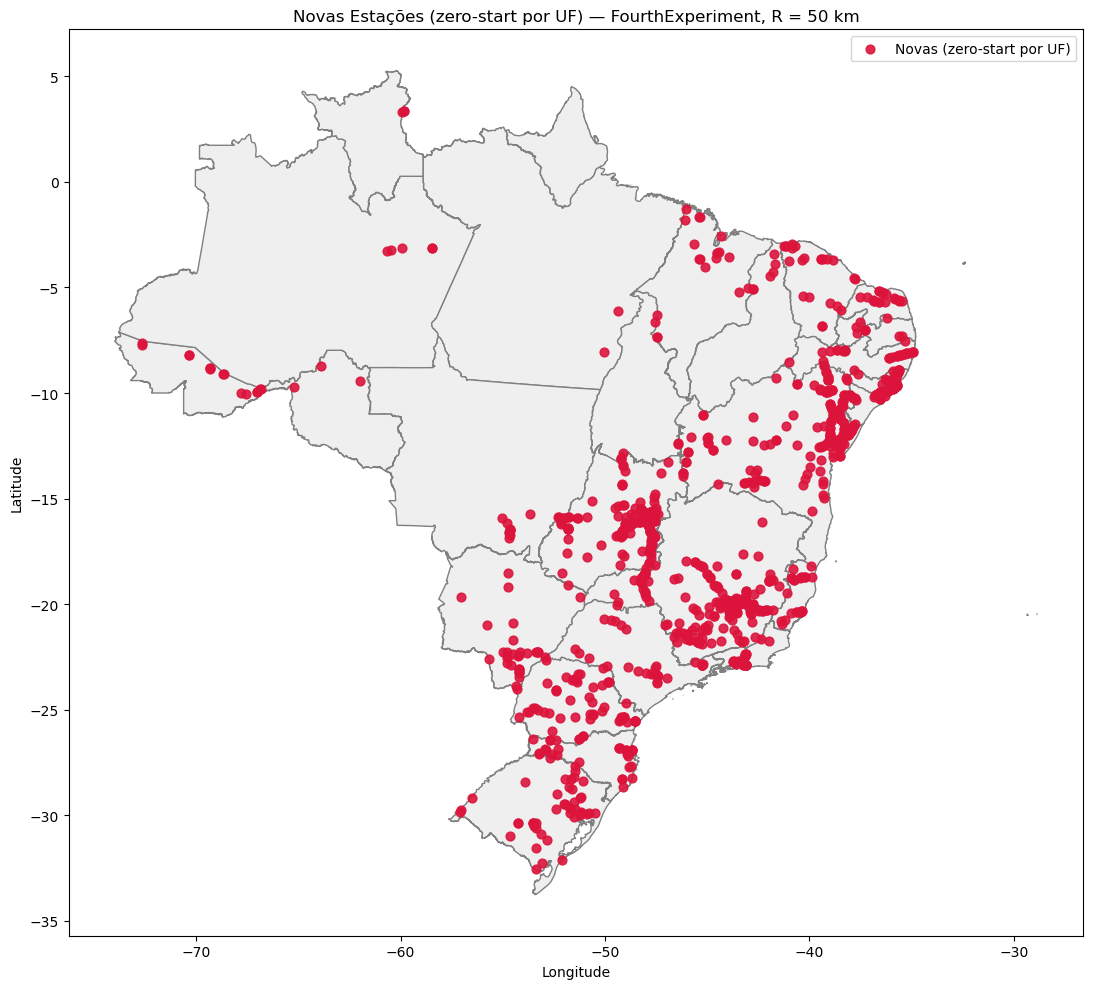

In [25]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from pathlib import Path
import geobr  # pip install geobr

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()
CUR  = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Experimento que queremos visualizar
EXPERIMENTO = "WithoutFlow/FourthExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
# 'supply_existing' não é usado aqui, pois estamos plotando só as novas
new = pd.read_parquet(OUTPUT_DIR / "sites_new_mip_experiment11.parquet")

# ─────────── MAPEAR LON/LAT VIA GRAFO ───
lon = {n: d["x"] for n, d in G.nodes(data=True)}
lat = {n: d["y"] for n, d in G.nodes(data=True)}
new["lon"] = new["node"].map(lon)
new["lat"] = new["node"].map(lat)

# ─────────── GEO DATAFRAME ───────────
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new.lon, new.lat),
    crs="EPSG:4326"
)

# ─────────── CARREGA MALHA DE ESTADOS ───
ufs = geobr.read_state(year=2020)[["abbrev_state", "geometry"]]
ufs = ufs.rename(columns={"abbrev_state": "UF"})

# ─────────── PLOT ─────────────────────
fig, ax = plt.subplots(figsize=(12, 10))
ufs.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=40,
    label="Novas (zero-start por UF)",
    alpha=0.9,
    zorder=3
)

ax.set_title("Novas Estações (zero-start por UF) — FourthExperiment, R = 50 km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Terceiro subexperimento R_KM = 300 km

In [ ]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from pathlib import Path
import geobr  # pip install geobr

# ─────────── ENCONTRA CACHE DINAMICAMENTE ───────────
HERE = Path().resolve()
CUR  = HERE
while CUR != CUR.parent:
    if (CUR / "cache").is_dir():
        CACHE = CUR / "cache"
        break
    CUR = CUR.parent
else:
    raise FileNotFoundError(f"Não achei pasta 'cache' acima de {HERE}")

# ─────────── CONFIGURAÇÕES ───────────
PARQUET_DIR = CACHE / "parquet"
GRAPHML     = CACHE / "graph_Brazil.graphml"

# Experimento que queremos visualizar
EXPERIMENTO = "WithoutFlow/FourthExperiment"
OUTPUT_DIR  = PARQUET_DIR / EXPERIMENTO

# ─────────── CARREGA GRAFO ───────────
G = ox.load_graphml(str(GRAPHML))

# ─────────── CARREGA DADOS ───────────
# 'supply_existing' não é usado aqui, pois estamos plotando só as novas
new = pd.read_parquet(OUTPUT_DIR / "sites_new_mip_experiment12.parquet")

# ─────────── MAPEAR LON/LAT VIA GRAFO ───
lon = {n: d["x"] for n, d in G.nodes(data=True)}
lat = {n: d["y"] for n, d in G.nodes(data=True)}
new["lon"] = new["node"].map(lon)
new["lat"] = new["node"].map(lat)

# ─────────── GEO DATAFRAME ───────────
g_new = gpd.GeoDataFrame(
    new,
    geometry=gpd.points_from_xy(new.lon, new.lat),
    crs="EPSG:4326"
)

# ─────────── CARREGA MALHA DE ESTADOS ───
ufs = geobr.read_state(year=2020)[["abbrev_state", "geometry"]]
ufs = ufs.rename(columns={"abbrev_state": "UF"})

# ─────────── PLOT ─────────────────────
fig, ax = plt.subplots(figsize=(12, 10))
ufs.plot(ax=ax, color="#EFEFEF", edgecolor="gray")

g_new.plot(
    ax=ax,
    marker="o",
    color="crimson",
    markersize=40,
    label="Novas (zero-start por UF)",
    alpha=0.9,
    zorder=3
)

ax.set_title("Novas Estações (zero-start por UF) — FourthExperiment, R = 300 km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()